In [1]:
## Importing necessary Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Importinng the dataset
data=pd.read_csv("ABC_Stock1.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-01,1.502857,1.560714,1.500000,1.550714,1.034021,90384000
1,2009-12-02,NaN,1.564286,1.529286,1.538571,1.025924,51324000
2,2009-12-03,NaN,1.560000,1.497143,1.502143,1.001633,47824000
3,2009-12-04,1.495714,1.512143,1.483571,1.510714,1.007349,44485000
4,2009-12-05,1.492857,1.510714,1.480714,1.489286,0.993060,46544400
5,2009-12-06,1.484286,1.505714,1.457857,1.503571,1.002586,37059400
6,2009-12-07,NaN,1.517857,1.457143,1.460714,0.974009,33786200
7,2009-12-08,1.460714,1.472143,1.425714,1.455714,0.970675,67834200
8,2009-12-09,1.446429,1.524286,1.443571,1.515000,1.010206,45784200
9,2009-12-10,1.522857,1.522857,1.478571,1.492143,0.994965,48168400


In [5]:
##Converting to the date to datetime
data["Date"]=pd.to_datetime(data["Date"])

In [6]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
# Checking for missing value
data.isnull().sum()

Date          0
Open         13
High          0
Low           0
Close         0
Adj Close     0
Volume        0
dtype: int64

In [8]:
print("Number of row \t",data.shape[0])
print("Number of columns ",data.shape[1])

Number of row 	 3853
Number of columns  7


In [10]:
## Using the interpolate to guess the missing data
dataset=data.interpolate()
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-01,1.502857,1.560714,1.500000,1.550714,1.034021,90384000
1,2009-12-02,1.500476,1.564286,1.529286,1.538571,1.025924,51324000
2,2009-12-03,1.498095,1.560000,1.497143,1.502143,1.001633,47824000
3,2009-12-04,1.495714,1.512143,1.483571,1.510714,1.007349,44485000
4,2009-12-05,1.492857,1.510714,1.480714,1.489286,0.993060,46544400
...,...,...,...,...,...,...,...
3848,2020-06-14,185.800003,188.389999,185.789993,188.020004,188.020004,26219800
3849,2020-06-15,188.350006,188.990005,185.919998,186.529999,186.529999,31646400
3850,2020-06-16,186.229996,189.490005,184.729996,188.160004,188.160004,31035200
3851,2020-06-17,190.020004,196.330002,189.809998,195.089996,195.089996,51034200


In [16]:
## Splitting dataset into testing and 
training_set = dataset.iloc[0:3793, 1:2].values
testing_set = dataset.iloc[3793:, 1:2].values

In [17]:
#Splitting the dataset into training and testing
training_set.shape, testing_set.shape

((3793, 1), (60, 1))

In [18]:
##Performing Feature Scalling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
##Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [20]:
## Rehaping the dataset
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

###Building and Training the RNN

In [21]:
##Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
#Initialising the RNN
regressor = Sequential()

In [24]:
##Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [25]:
##Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
##Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [27]:
##Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [28]:
##Adding the output layer
regressor.add(Dense(units = 1))

In [29]:
##Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
###Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 95ms/step - loss: 8.4408e-04
Epoch 2/100
38/38 [==============================] - 4s 96ms/step - loss: 8.0992e-05
Epoch 3/100
38/38 [==============================] - 4s 100ms/step - loss: 8.7127e-05
Epoch 4/100
38/38 [==============================] - 4s 100ms/step - loss: 7.4085e-05
Epoch 5/100
38/38 [==============================] - 4s 99ms/step - loss: 6.3620e-05
Epoch 6/100
38/38 [==============================] - 4s 100ms/step - loss: 6.4711e-05
Epoch 7/100
38/38 [==============================] - 4s 102ms/step - loss: 5.2277e-05
Epoch 8/100
38/38 [==============================] - 4s 105ms/step - loss: 4.6425e-05
Epoch 9/100
38/38 [==============================] - 4s 106ms/step - loss: 4.3142e-05
Epoch 10/100
38/38 [==============================] - 4s 99ms/step - loss: 5.2180e-05
Epoch 11/100
38/38 [==============================] - 4s 101ms/step - loss: 4.4485e-05
Epoch 12/100
38/38 [==============================] - 4

###Making the predictions and visualising the results

In [32]:
##Getting the predicted stock price
dataset_total=dataset["Open"]
inputs = dataset_total[len(dataset_total) - len(testing_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

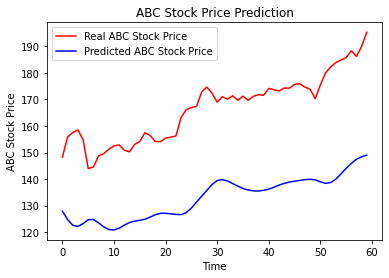

In [33]:
##Visualising the results
real_stock_price=dataset.iloc[3793:, 1:2].values
plt.plot(real_stock_price, color = 'red', label = 'Real ABC Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ABC Stock Price')
plt.title('ABC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ABC Stock Price')
plt.legend()
plt.show()

In [35]:
##Calculating RMSE
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(" Root mean Square Error",rmse)

 Root mean Square Error 34.26245741348225
